# Particle in a multistable potential


## Phase portrait for a one-dimensional system

Equations of motion for a point particle in a 1d potential can be written as a system of two ODEs:

$$ \begin{cases} \dot x = v \\ \dot v = - \frac{1}{m}U'(x) \end{cases} $$

We can draw a phase portrait, i.e. parametric solutions $(x(t),v(t))$ and a vector field defined by the right hand sides in the $(x,v)$ phase space.


## Example: motion in the $U(x) = x^3-x^2$ potential


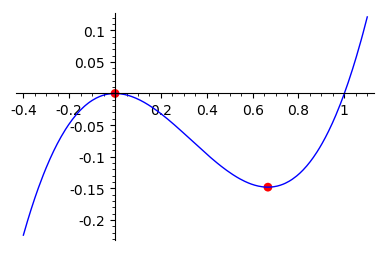

In [2]:
var('v')
m = 1
U(x) = x^3-x^2
xmax,xmin = sorted([s_.rhs() for s_ in solve(U.diff(x)==0,x)])
Emin = U(xmin)
Etot = 1/2*m*v^2 + U(x)

plot(U(x),(x,-0.4,1.1),figsize=4) +\
 point([xmin,U(xmin)],color='red',size=40)+\
 point([xmax,U(xmax)],color='red',size=40)

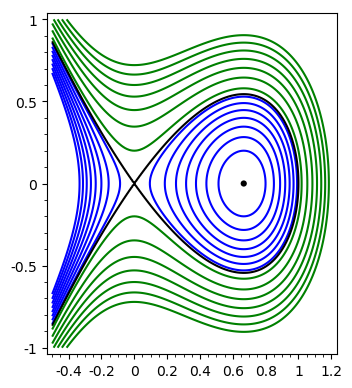

In [3]:
pkt = point((xmin,0),size=20,color='black')
plt =sum([ implicit_plot(Etot==E0,(x,-1/2,1.2),(v,-1,1),color='blue')\
          for E0 in srange(Emin,0.0,0.02)])
plt +=implicit_plot(Etot==0,(x,-1/2,1.2),(v,-1,1),color='black') +pkt
plt +=sum([ implicit_plot(Etot==E0,(x,-1/2,1.2),(v,-1,1),color='green')\
           for E0 in srange(0.02,-2*Emin,0.04)])
plt.show()


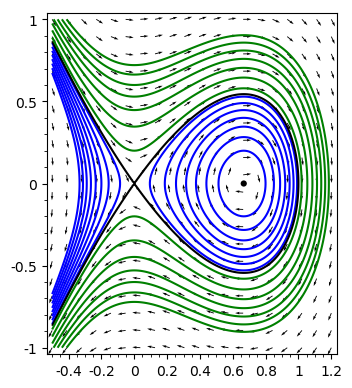

In [4]:
vector_field = vector([v,-U.diff(x)])
plt  + plot_vector_field(vector_field.normalized(),(x,-1/2,1.2),(v,-1,1))


## Harmonic  oscillation  limit  a one-dimensional system

Consider a conservative one-dimensional system. In this case, the force can always be represented as a potential gradient:
$$f(x) = -\frac{\partial U(x)}{dx}.$$
Consider a certain potential that has a minium. The necessary condition for the minimum function is the disappearance of the first derivative, ie the force in the minimum potential is zero. Let's expand the potential in the Taylor series around the minimum. we have:
$$ U(x) = U(x_0) + \underbrace{U'(x_0)( x-x_0)}_{=0}+\frac{1}{2} U''(x_0)(x-x_0)^2+...$$
With accuracy as to the constant, we have effective traffic in the potential of the type:
$$U(x) = \frac{1}{2} k x^2,$$
if only $x$ would be close enough to $x_0$ to cut off Taylor's series, it was justified.
The Newton equation for such a motion is as follows:
$$m \ddot x = m  a  = F = -U'(x)  =  -k x$$
This is the already known equation for the harmonic oscillator, which describes the arrangement with any potential cavity with approximately small vibrations.

In [5]:
var('x v')
Etot = 1/2*v^2 + U(x)
Elin = 1/2*v^2 + U(xmin)+1/2*U.diff(x,2).subs(x==xmin)*(x-xmin)^2
show(Etot)
show(Elin)

x^3 + 1/2*v^2 - x^2

x |--> 1/2*v^2 + 1/9*(3*x - 2)^2 - 4/27

In [6]:
Emin = Etot(x=xmin,v=0)
Emin

-4/27

Let's have a look at  the trajectories for small deflections of linearized and exact system. The blue line below is a separatrix - i.e. a solution with $E=0$

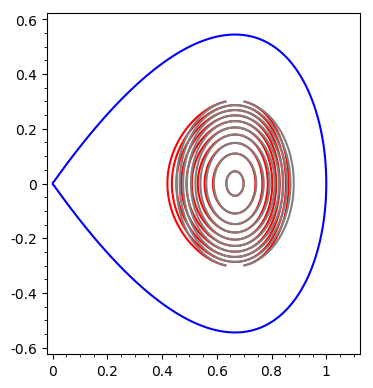

In [7]:
plt = sum([ implicit_plot(Etot==E0,(x,.4,.91),(v,-.3,.3),color='red') \
          for E0 in srange(Emin+1e-3,-0.1,0.005)])
plt += implicit_plot(Etot==0.00,(x,0,1.1), (v,-.6,.6),color='blue') 

plt_lin =sum([ implicit_plot(Elin==E0+1e-3,(x,.4,.91),(v,-.3,.3),color='gray') \
              for E0 in srange(Emin,-0.1,0.005)])
plt+plt_lin

For larger ones, there is a growing discrepancy:

 - for the nonlinear system, above certain energy, there are open trajectories
 - motion in an linearized system is always an ellipse. The period does not depend on the amplitude.

## Time to reach the hill

Without the loss of generality we can assume that the top of the potential hill  is at the beginning of the coordinate system $(x,E)$. Then we examine the limit $E\to0$ boundary

Near zero, we can approximate the potential by  the reverse parabola. Then the time to reach the hill from a certain point (for example $x=1$) reads:

In [8]:
var('E')
assume(E>0)
integrate(-1/sqrt(E+x^2),x,1,0)

arcsinh(1/sqrt(E))

This result is divergent for $E\to0$:

In [9]:
limit( arcsinh(1/x),x=0)

Infinity

It means that time needed to climb a hill with *just* enough kinetic energy is **infinite**. It is valid only for potential hills which have zero derivative at the top. On the other hand for potential barriers which do not have this property, for example, $U(x)=-|x|$, the particle can reach the top with just enought energy in  finite time.

Let analyze it:

In [10]:
U1(x) = -abs(x)
E0 = 0

we can plot velocity and potential:

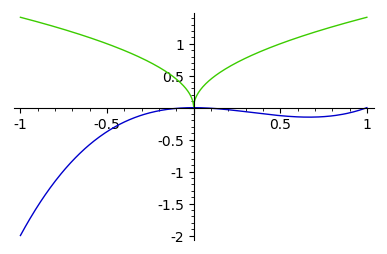

In [11]:
plot([U(x), sqrt(2*(E0 - U1(x)))],(x,-1,1),figsize=4)

the time of travel from $x=-1$ to $x=0$ is given by:

$$t=\sqrt{\frac{m}{2}} \; \int_{-x1}^{x1}{\frac{dx}{(\sqrt(E-U(x)}}$$

which in this case is:

In [12]:
sqrt(m/2.)*integrate(1/sqrt((E0- U1(x))),x,-1,0).n()

1.41421356237310

In the case of potentials which behave like $|x|^\alpha$, for $\alpha>1$ we can calculate time  of travel if we particle total energy is by $dE$ larger than potential barrier. 

In [13]:
dE = 0.01

In [14]:
E0 = U(xmin)+dE
E0

-0.138148148148148

In [15]:
_, x1,x2 = sorted( [s_.rhs().n().real() for s_ in solve(U(x)==E0,x)])
x1,x2

(0.560919215938882, 0.762206802325432)

In [16]:
period = 2*sqrt(m/2.)*\
  integral_numerical(sqrt(E-U(x)).subs(E==E0) , x1,x2, algorithm='qags')[0]
period


0.0223211406255026

2/3


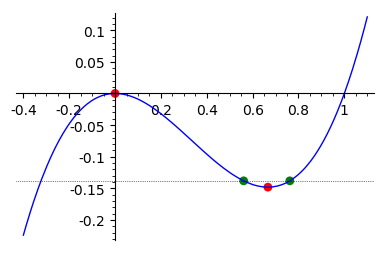

In [17]:
U(x) = x^3-x^2
xmax,xmin = sorted([s_.rhs() for s_ in solve(U.diff(x)==0,x)])
print(xmin)
plot(U(x),(x,-0.4,1.1),figsize=4,gridlines=[None,[E0]])+\
 point([xmin,U(xmin)],color='red',size=40)+\
 point([xmax,U(xmax)],color='red',size=40)+\
 point([x1,U(x1)],color='green',size=40)+\
 point([x2,U(x2)],color='green',size=40)


In [18]:
integral_numerical( 1/sqrt(E0-U(x)) , x1,x2, algorithm='qag')

(3.1721596231106926, 2.332448399655124e-06)

In [19]:
def T(E0):
    m = 1

    _, x1,x2 = sorted( [s_.rhs().n().real() for s_ in solve(U(x)==E0,x)])
    
    integral, error = \
      integral_numerical(1/sqrt(E0-U(x)), x1,x2, algorithm='qags')
    # print(":::",x1,x2,error)
    m = 1
    period = 2*sqrt(m/2.) * integral
    return period


In [20]:
period_num = T(U(xmin)+dE)
period_num

4.48611131060635

In [21]:
omega = sqrt(U(x).diff(x,2).subs(x==xmin.n()))
period_harm = 2*pi.n()/omega
period_harm

4.44288293815837

In [22]:
t_lst = srange(0, period_num, 0.01, include_endpoint=True) 
sol = desolve_odeint([v,-U.diff(x)],[x2,.0],t_lst,[x,v])

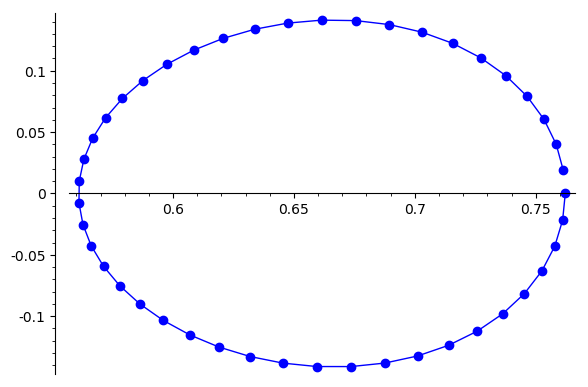

In [23]:
line(sol[::10,:],marker='o')

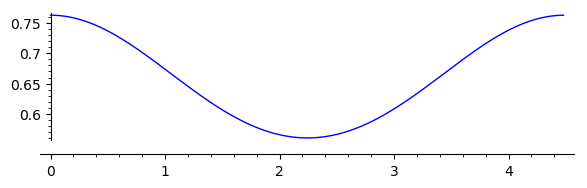

In [24]:
line(zip(t_lst,sol[:,0]),figsize=(6,2))

In [25]:
TonE = [(E_,T(E_)) for E_ in srange(U(xmin)+1e-6,-1e-5,0.001)]

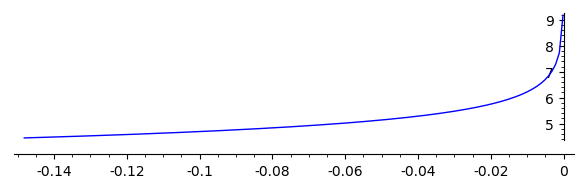

In [26]:
line(TonE, figsize=(6,2))

In [27]:
def t_hill(E0):
    m = 1

    x2, = [s_.rhs().n().real() for s_ in solve(U(x)==E0,x) if s_.rhs().n().imag().abs()<1e-6]
    
    integral, error = \
      integral_numerical(1/sqrt(E0-U(x)), 0,x2, algorithm='qags')
    #print(":::",0,x2,error)
    m = 1
    period = 2*sqrt(m/2.) * integral
    return period


In [28]:
t_hill(9.1)

1.53679467633445

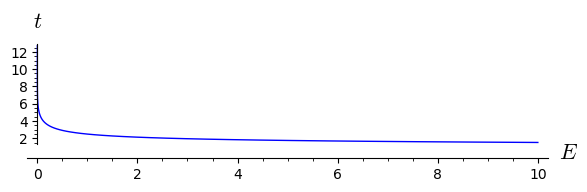

In [29]:
import numpy as np
t_E = [(E_,t_hill(E_)) for E_ in np.logspace(-6,1,120)]
line(t_E,axes_labels=['$E$','$t$'], figsize=(6,2))

In [ ]:
t_E = [(log(E_),t_hill(E_)) for E_ in np.logspace(-6,16,120)]
line(t_E,axes_labels=['$\log{10} E$','$t$'])

## Excercise 1
Analyze numerically or analytically how the period from the deflection in the nonlinear system depends
## Exercise 2
Examine in a similar way the system corresponding to the movement in the $U(x) = -\cos(x)$ potential - this is a physical pendulum.

\newpage